# Case Study: How Does a Bike-Share Navigate Speedy Success?

This is a capstone project for Google Data Analytics Professional Certificate. In this case study, I will perform data analysis for a fictional bike-share company called "Cyclistic" in order to help them attract more riders. Source data used in this analysis were published by by Motivate International Inc. and are publicly available.

The goal of analysis is to understand how casual riders and annual members use Cyclistic bikes differently and to design a new marketing strategy to convert casual riders into annual members.

## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Teams at Cyclistic 

- Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

- Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

- Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

- Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

## Business Task
Marketing analyst team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, team will design a new marketing strategy to convert casual riders into annual members.

## Prepare analysis

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Import monthly data

In [2]:
summary_jan = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202201-divvy-tripdata.csv')
summary_feb = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202202-divvy-tripdata.csv')
summary_mar = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202203-divvy-tripdata.csv')
summary_apr = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202204-divvy-tripdata.csv')
summary_may = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202205-divvy-tripdata.csv')
summary_jun = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202206-divvy-tripdata.csv')
summary_jul = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202207-divvy-tripdata.csv')
summary_aug = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202208-divvy-tripdata.csv')
summary_sep = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202209-divvy-tripdata.csv')
summary_oct = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202210-divvy-tripdata.csv')
summary_nov = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202211-divvy-tripdata.csv')
summary_dec = pd.read_csv('/Users/jihyeson/Desktop/Case Study 1/2022/202212-divvy-tripdata.csv')

In [3]:
summary_dec.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual


### 3. Combine monthly data to single table

In [4]:
yearly_summary = pd.concat([summary_jan,summary_feb,summary_mar,summary_apr,
                         summary_may, summary_jun,summary_jul,summary_aug, summary_sep,
                         summary_oct,summary_nov, summary_dec])

In [5]:
yearly_summary

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 8:41:56,2022-01-10 8:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 4:53:40,2022-01-25 4:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 0:18:04,2022-01-04 0:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 1:31:10,2022-01-20 1:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [6]:
yearly_summary.shape

(5667717, 13)

There are 5667717 rows and 13 columns.

In [7]:
yearly_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


### 4. Data Cleaning

Data type for 'started_at' and 'ended_at' should be changed from object to date/time.

In [8]:
yearly_summary['ended_at'] = pd.to_datetime(yearly_summary['ended_at'])
yearly_summary['started_at'] = pd.to_datetime(yearly_summary['started_at'])

Extract 'ride length' by subtracting from 'ended_at' to 'started at'

In [9]:
yearly_summary['ride_length'] = yearly_summary['ended_at']-yearly_summary['started_at']
yearly_summary.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


Check stats for data.

In [10]:
yearly_summary.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06,5667717
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01,0 days 00:19:26.597144670
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01,0 days 02:56:07.687857087
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01,-8 days +19:26:39
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01,0 days 00:05:49
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,0 days 00:10:17
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01,0 days 00:18:28
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00,28 days 17:47:15


Given the data showing min of ride length is negative, which is not possible, it looks like 'started_at' and 'ended_at' in some of lines are switched. 


In [11]:
yearly_summary['ride_length'] = abs(yearly_summary['ended_at']-yearly_summary['started_at'])
yearly_summary.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06,5667717
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01,0 days 00:19:26.875715036
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01,0 days 02:56:07.657101189
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01,0 days 00:00:00
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01,0 days 00:05:49
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,0 days 00:10:17
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01,0 days 00:18:28
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00,28 days 17:47:15


Check if there are any duplicates

In [12]:
yearly_summary[yearly_summary.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length


Extract 'day of week' from started_at. From Monday 0 to Sunday 6

In [13]:
from datetime import datetime as dt
yearly_summary['day_of_week'] = yearly_summary['started_at'].dt.dayofweek
yearly_summary.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,3


Extract 'month' from started_at.

In [14]:
yearly_summary['month'] = yearly_summary['started_at'].dt.month
yearly_summary.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,3,1
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,0,1
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,1,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,1,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,3,1


### 5. Charts/Graphs

### Number of riders by membership type

In [15]:
number_of_riders = yearly_summary.groupby('member_casual').count()[['ride_id']]
number_of_riders

,ride_id
member_casual,
casual,2322032
member,3345685


In [16]:
number_of_riders.values

array([[2322032],
       [3345685]])

In [17]:
number_of_riders.unstack().values

array([2322032, 3345685])

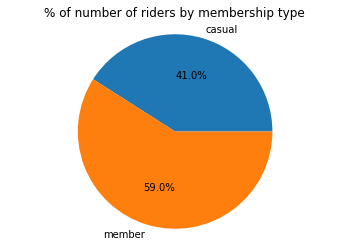

In [18]:
plt.pie(number_of_riders.unstack().values, labels=number_of_riders.index, autopct='%1.1f%%')
plt.title('% of number of riders by membership type')
plt.axis('equal')
plt.show()

### Min/max/mean ride length by membership type

In [19]:
grouped_by_membership = yearly_summary.groupby('member_casual')
grouped_by_membership['ride_length'].agg([min,max,np.mean])

,min,max,mean
member_casual,,,
casual,0 days,28 days 17:47:15,0 days 00:29:08.746110734
member,0 days,7 days 04:33:21,0 days 00:12:43.035640832


### Average ride length by day_of week

In [20]:
grouped_by_weekday = yearly_summary.groupby('day_of_week')

mean_by_weekday = grouped_by_weekday['ride_length'].agg([np.mean])
mean_by_weekday

,mean
day_of_week,
0,0 days 00:18:31.486154718
1,0 days 00:16:44.786055738
2,0 days 00:16:27.859208516
3,0 days 00:17:09.885584565
4,0 days 00:19:00.397944840
5,0 days 00:23:40.696008929
6,0 days 00:24:04.113200619


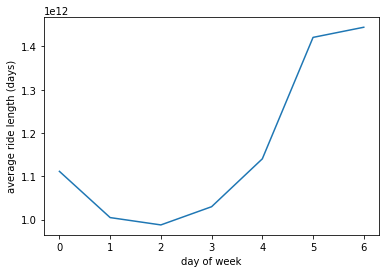

In [21]:
plt.figure()
plt.plot(mean_by_weekday)
plt.xlabel('day of week')
plt.ylabel('average ride length (days)')
plt.show()

In [22]:
mean_by_membership = yearly_summary.pivot_table(values='ride_length', index='day_of_week',
                           columns='member_casual', aggfunc=[np.mean])
mean_by_membership

mean                          
member_casual                    casual                    member
day_of_week                                                      
0             0 days 00:29:11.216677770 0 days 00:12:16.200845482
1             0 days 00:25:49.463275272 0 days 00:12:07.791770948
2             0 days 00:24:45.050704564 0 days 00:12:07.476411087
3             0 days 00:25:32.861397213 0 days 00:12:17.575029919
4             0 days 00:28:02.640673317 0 days 00:12:31.841697246
5             0 days 00:32:36.826093112 0 days 00:14:08.392222991
6             0 days 00:34:03.484214828 0 days 00:14:01.935897402

In [23]:
mean_by_membership.axes

[Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day_of_week'),
 MultiIndex([('mean', 'casual'),
             ('mean', 'member')],
            names=[None, 'member_casual'])]

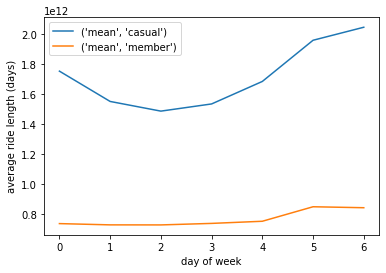

In [24]:
plt.figure()
plt.plot(mean_by_membership)
plt.xlabel('day of week')
plt.ylabel('average ride length (days)')
plt.legend(mean_by_membership.columns)
plt.show()


### Number of riders by day of week

In [25]:
number_by_dow = yearly_summary.pivot_table(values='ride_id', index='day_of_week',
                           columns='member_casual', aggfunc='count')
number_by_dow

member_casual,casual,member
day_of_week,,
0,277675,473339
1,263746,518626
2,274354,523869
3,309330,532261
4,334701,467086
5,473190,443281
6,389036,387223


<Figure size 720x504 with 0 Axes>

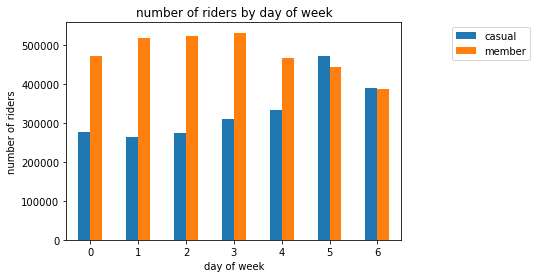

In [26]:
fig = plt.figure(figsize =(10, 7))
number_by_dow.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("day of week")
plt.ylabel("number of riders")
plt.title("number of riders by day of week")
plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right');

### Number of riders by month

In [27]:
riders_by_month = yearly_summary.pivot_table(values='ride_id', index='month',
                           columns='member_casual', aggfunc='count')
riders_by_month

member_casual,casual,member
month,,
1,18520,85250
2,21416,94193
3,89882,194160
4,126417,244832
5,280415,354443
6,369051,400153
7,406055,417433
8,358924,427008
9,296697,404642


<Figure size 720x504 with 0 Axes>

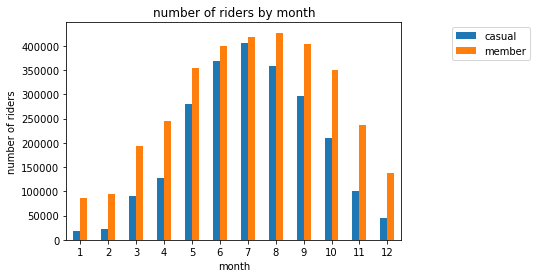

In [28]:
fig = plt.figure(figsize =(10, 7))
riders_by_month.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("month")
plt.ylabel("number of riders")
plt.title("number of riders by month")
plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right');

### Top ten most visited pick-up bike station for casual riders

In [53]:
yearly_summary[yearly_summary['member_casual']=='casual'].pivot_table(
    values='ride_id', index='start_station_name',
                           columns='member_casual',
    aggfunc='count').sort_values(by=['casual'],ascending=False).iloc[0:10]

member_casual,casual
start_station_name,
Streeter Dr & Grand Ave,58095
DuSable Lake Shore Dr & Monroe St,31863
Millennium Park,25530
Michigan Ave & Oak St,25265
DuSable Lake Shore Dr & North Blvd,23657
Shedd Aquarium,20265
Theater on the Lake,18452
Wells St & Concord Ln,16217
Dusable Harbor,14104


### Top ten most visited pick-up bike station for members

In [56]:
yearly_summary[yearly_summary['member_casual']=='member'].pivot_table(
    values='ride_id', index='start_station_name',
                           columns='member_casual',
    aggfunc='count').sort_values(by=['member'],ascending=False).iloc[0:10]

member_casual,member
start_station_name,
Kingsbury St & Kinzie St,24937
Clark St & Elm St,22040
Wells St & Concord Ln,21298
University Ave & 57th St,19953
Clinton St & Washington Blvd,19827
Ellis Ave & 60th St,19503
Loomis St & Lexington St,19128
Wells St & Elm St,18987
Clinton St & Madison St,18931


## Conclusion

Due to data-privacy issues that prohibit from using riders’ personally identifiable information,  I was not able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes. 
However, we can get some insights from the analysis:
- Casual riders usually ride longer for one time usage. Perhaps we can differentiate the price for shorter period and longer period to attract casual riders converting to the members.
- Number of casual riders and duration of ride are peak in the weekends. We can carry out our marketing campaign focus on weekends or hold an events during weekends.
- Number of casual riders are peak in the summer season. We can focus summer season ridings. 
- We can open a popup station to promote membership in the top ten most visited pick up bike station. 